In [3]:
import numpy as np
import torch
import imageio.v3 as iio
import matplotlib.pyplot as plt
from skimage import color


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
im=iio.imread('./dog.png')

In [5]:
np.shape(im)

(1197, 1200, 3)

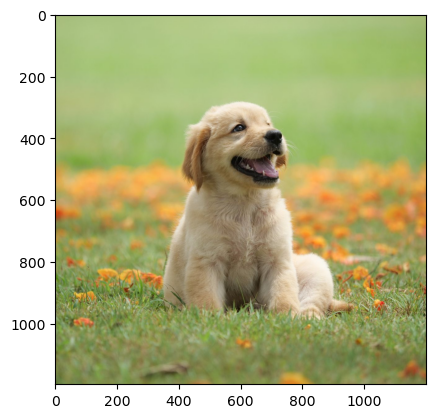

In [6]:
plt.imshow(im)

In [7]:
im_gray = color.rgb2gray(im)
xdim = np.shape(im_gray)[0]
ydim = np.shape(im_gray)[1]


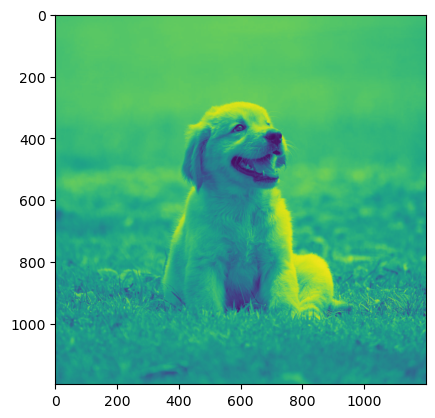

In [8]:
plt.imshow(im_gray)

In [9]:
im_gray_torch = torch.tensor(im_gray)
U, S, Vh = torch.linalg.svd(im_gray_torch,full_matrices= True)


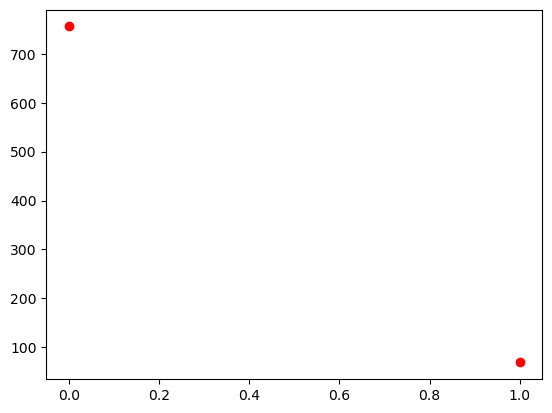

In [21]:
plt.plot(S[0:2],'ro')

In [11]:
def reconstruct_image(U,S,Vh,rank):

 im_red_rank = torch.zeros([xdim,ydim])
 for k in range (0, rank):
   im_red_rank = im_red_rank + (U[:,k].reshape([xdim,1]))*S[k].reshape([1,1])*Vh[k,:].reshape([1,ydim])

 return im_red_rank


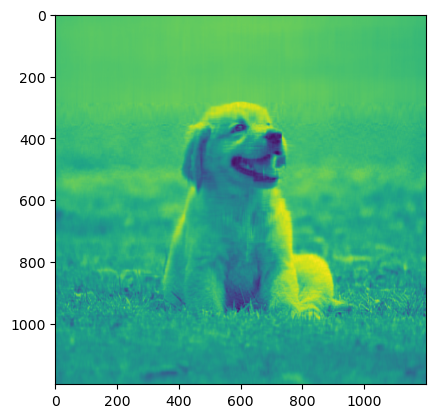

In [24]:
plt.imshow(reconstruct_image(U,S,Vh,50))